In [1]:
import numpy as np
import xarray as xr

In [2]:
gpcp = xr.open_dataset('/home/amal/dir/gpcp/precip.mon.mean.nc')

In [3]:
gpcp

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, time: 442)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2015-10-01
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    Conventions:      COARDS
    title:            GPCP Version 2.2 Combined Precipitation Dataset (Final)
    platform:         Observation
    source:           GPCP Polar Satellite Precipitation Data Centre - Emissi...
    version:          V2.2
    comments:         Please redownload if you obtained this file before Aug ...
    Acknowledgement:  \n,Please cite the original source of the data.\nPlease...
    history:          Converted from netCDF3 to chunked, deflated NetCDF4 Aug...
    dataset_title:    Global Precipitation Analysis (GPCP)
    documentation:    https://www.esrl.noaa.gov/psd/data/gridded/data.gpcp.html
    References:       https://www.esrl.noaa.gov/psd/data/gridded/data.gpcp.html

In [21]:
gb_mon = gpcp.precip.groupby('time.month')

#### CTCZ

In [8]:
ctc = gpcp.sel(lat=slice(25, 15), lon=slice(75, 85))

In [9]:
ctc

<xarray.Dataset>
Dimensions:  (lat: 4, lon: 4, time: 442)
Coordinates:
  * lat      (lat) float32 23.75 21.25 18.75 16.25
  * lon      (lon) float32 76.25 78.75 81.25 83.75
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2015-10-01
Data variables:
    precip   (time, lat, lon) float32 0.635 1.483 1.798 ... 1.163 2.15 5.532
Attributes:
    Conventions:      COARDS
    title:            GPCP Version 2.2 Combined Precipitation Dataset (Final)
    platform:         Observation
    source:           GPCP Polar Satellite Precipitation Data Centre - Emissi...
    version:          V2.2
    comments:         Please redownload if you obtained this file before Aug ...
    Acknowledgement:  \n,Please cite the original source of the data.\nPlease...
    history:          Converted from netCDF3 to chunked, deflated NetCDF4 Aug...
    dataset_title:    Global Precipitation Analysis (GPCP)
    documentation:    https://www.esrl.noaa.gov/psd/data/gridded/data.gpcp.html
    References:       https://www.esrl.noaa.gov/psd/data/gridded/data.gpcp.html

In [74]:
ctcz = ctc.isel(time=ctc.time.dt.month.isin([6, 7, 8, 9])).groupby('time.year')
ctcz = ctcz.mean(dim=['lat', 'lon', 'time'])
ctcz

<xarray.Dataset>
Dimensions:  (year: 37)
Coordinates:
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2011 2012 2013 2014 2015
Data variables:
    precip   (year) float32 6.113 8.695 8.014 7.097 ... 8.143 9.257 6.935 7.647

In [73]:
ctcz

DatasetGroupBy, grouped over 'year'
37 groups with labels 1979, 1980, 1981, ..., 2014, 2015.

In [ ]:
ctcz.precip.values

#### some conversions

In [66]:
gpcp.lon.values[34]

86.25

In [56]:
gpcp.lon.values

array([  1.25,   3.75,   6.25,   8.75,  11.25,  13.75,  16.25,  18.75,
        21.25,  23.75,  26.25,  28.75,  31.25,  33.75,  36.25,  38.75,
        41.25,  43.75,  46.25,  48.75,  51.25,  53.75,  56.25,  58.75,
        61.25,  63.75,  66.25,  68.75,  71.25,  73.75,  76.25,  78.75,
        81.25,  83.75,  86.25,  88.75,  91.25,  93.75,  96.25,  98.75,
       101.25, 103.75, 106.25, 108.75, 111.25, 113.75, 116.25, 118.75,
       121.25, 123.75, 126.25, 128.75, 131.25, 133.75, 136.25, 138.75,
       141.25, 143.75, 146.25, 148.75, 151.25, 153.75, 156.25, 158.75,
       161.25, 163.75, 166.25, 168.75, 171.25, 173.75, 176.25, 178.75,
       181.25, 183.75, 186.25, 188.75, 191.25, 193.75, 196.25, 198.75,
       201.25, 203.75, 206.25, 208.75, 211.25, 213.75, 216.25, 218.75,
       221.25, 223.75, 226.25, 228.75, 231.25, 233.75, 236.25, 238.75,
       241.25, 243.75, 246.25, 248.75, 251.25, 253.75, 256.25, 258.75,
       261.25, 263.75, 266.25, 268.75, 271.25, 273.75, 276.25, 278.75,
      

In [57]:
lon1 = (gpcp.lon.values + 180) % 360 - 180
lon1

array([   1.25,    3.75,    6.25,    8.75,   11.25,   13.75,   16.25,
         18.75,   21.25,   23.75,   26.25,   28.75,   31.25,   33.75,
         36.25,   38.75,   41.25,   43.75,   46.25,   48.75,   51.25,
         53.75,   56.25,   58.75,   61.25,   63.75,   66.25,   68.75,
         71.25,   73.75,   76.25,   78.75,   81.25,   83.75,   86.25,
         88.75,   91.25,   93.75,   96.25,   98.75,  101.25,  103.75,
        106.25,  108.75,  111.25,  113.75,  116.25,  118.75,  121.25,
        123.75,  126.25,  128.75,  131.25,  133.75,  136.25,  138.75,
        141.25,  143.75,  146.25,  148.75,  151.25,  153.75,  156.25,
        158.75,  161.25,  163.75,  166.25,  168.75,  171.25,  173.75,
        176.25,  178.75, -178.75, -176.25, -173.75, -171.25, -168.75,
       -166.25, -163.75, -161.25, -158.75, -156.25, -153.75, -151.25,
       -148.75, -146.25, -143.75, -141.25, -138.75, -136.25, -133.75,
       -131.25, -128.75, -126.25, -123.75, -121.25, -118.75, -116.25,
       -113.75, -111

In [64]:
np.where(lon1 == 83.75)

(array([33]),)

##### -------------------------------- end conversions-----------------------------------

#### NINO34

In [76]:
nino = gpcp.precip.sel(lat=slice(6, -6), lon=slice(190, 240))
nino

<xarray.DataArray 'precip' (time: 442, lat: 4, lon: 20)>
array([[[6.451962, 6.593358, ..., 1.938469, 2.05861 ],
        [4.851894, 4.500314, ..., 1.018175, 1.143463],
        [4.586105, 4.626799, ..., 0.597706, 0.714605],
        [6.521724, 6.686326, ..., 0.453981, 0.595067]],

       [[9.527305, 8.553582, ..., 2.597057, 2.351926],
        [4.62756 , 3.796255, ..., 1.557541, 1.460626],
        [2.402292, 1.918108, ..., 1.246835, 1.326009],
        [2.850141, 2.283459, ..., 1.210387, 1.229527]],

       ...,

       [[8.473384, 9.949474, ..., 5.023375, 6.1302  ],
        [6.096604, 8.78199 , ..., 0.695697, 0.435175],
        [3.668828, 6.657979, ..., 0.050386, 0.063794],
        [3.268851, 2.310091, ..., 0.069729, 0.070932]],

       [[4.065207, 3.901026, ..., 2.153092, 2.385095],
        [7.035698, 6.163594, ..., 0.629663, 0.890483],
        [7.816064, 6.778383, ..., 0.118151, 0.103643],
        [7.567608, 5.140919, ..., 0.105212, 0.034825]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 3.75 1.25 -1.25 -3.75
  * lon      (lon) float32 191.2 193.8 196.2 198.8 ... 231.2 233.8 236.2 238.8
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2015-10-01
Attributes:
    long_name:     Average Monthly Rate of Precipitation
    valid_range:   [  0. 100.]
    units:         mm/day
    precision:     32767
    var_desc:      Precipitation
    dataset:       GPCP Version 2.2 Combined Precipitation Dataset
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Mean
    actual_range:  [ 0.      47.07601]

In [77]:
jjas = nino.isel(time=nino.time.dt.month.isin([6, 7, 8, 9])).groupby('time.year')
jjas_nino = jjas.mean(dim=['lat', 'lon', 'time'])

In [78]:
jjas_nino

<xarray.DataArray 'precip' (year: 37)>
array([1.1518666 , 1.4183042 , 1.2649194 , 2.099237  , 2.5854049 ,
       1.108494  , 1.0943687 , 1.2171085 , 3.144078  , 0.36098912,
       1.2173299 , 1.3785508 , 1.7577587 , 1.5822397 , 1.6723284 ,
       1.3086118 , 0.61894757, 1.0660549 , 5.7392535 , 0.7875743 ,
       0.6798031 , 0.8756994 , 0.9308136 , 1.8623798 , 0.7837216 ,
       1.0424511 , 1.3194797 , 1.2783625 , 0.77766883, 1.1711881 ,
       1.5720187 , 0.5763857 , 1.3190744 , 1.5168444 , 0.5732853 ,
       1.5737202 , 4.58584   ], dtype=float32)
Coordinates:
  * year     (year) int64 1979 1980 1981 1982 1983 ... 2011 2012 2013 2014 2015

### Scatter and corr

In [80]:
ctcz_jjas_arr = ctcz.precip.values
nino_jjas_arr = jjas_nino.values

In [81]:
ctcz_jjas_arr

array([6.112728 , 8.69514  , 8.013788 , 7.096641 , 9.031912 , 7.0502644,
       7.346808 , 7.723083 , 6.5399866, 8.758568 , 8.090153 , 8.862542 ,
       7.477235 , 6.9974966, 7.846735 , 9.325287 , 7.329826 , 7.923261 ,
       7.1450686, 7.8536777, 8.007577 , 7.215824 , 7.4257965, 6.623407 ,
       8.149498 , 7.1567016, 8.5234375, 8.578615 , 8.911424 , 8.188467 ,
       6.780673 , 8.603937 , 8.160403 , 8.142564 , 9.2566185, 6.9346066,
       7.646946 ], dtype=float32)

In [82]:
nino_jjas_arr

array([1.1518666 , 1.4183042 , 1.2649194 , 2.099237  , 2.5854049 ,
       1.108494  , 1.0943687 , 1.2171085 , 3.144078  , 0.36098912,
       1.2173299 , 1.3785508 , 1.7577587 , 1.5822397 , 1.6723284 ,
       1.3086118 , 0.61894757, 1.0660549 , 5.7392535 , 0.7875743 ,
       0.6798031 , 0.8756994 , 0.9308136 , 1.8623798 , 0.7837216 ,
       1.0424511 , 1.3194797 , 1.2783625 , 0.77766883, 1.1711881 ,
       1.5720187 , 0.5763857 , 1.3190744 , 1.5168444 , 0.5732853 ,
       1.5737202 , 4.58584   ], dtype=float32)

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

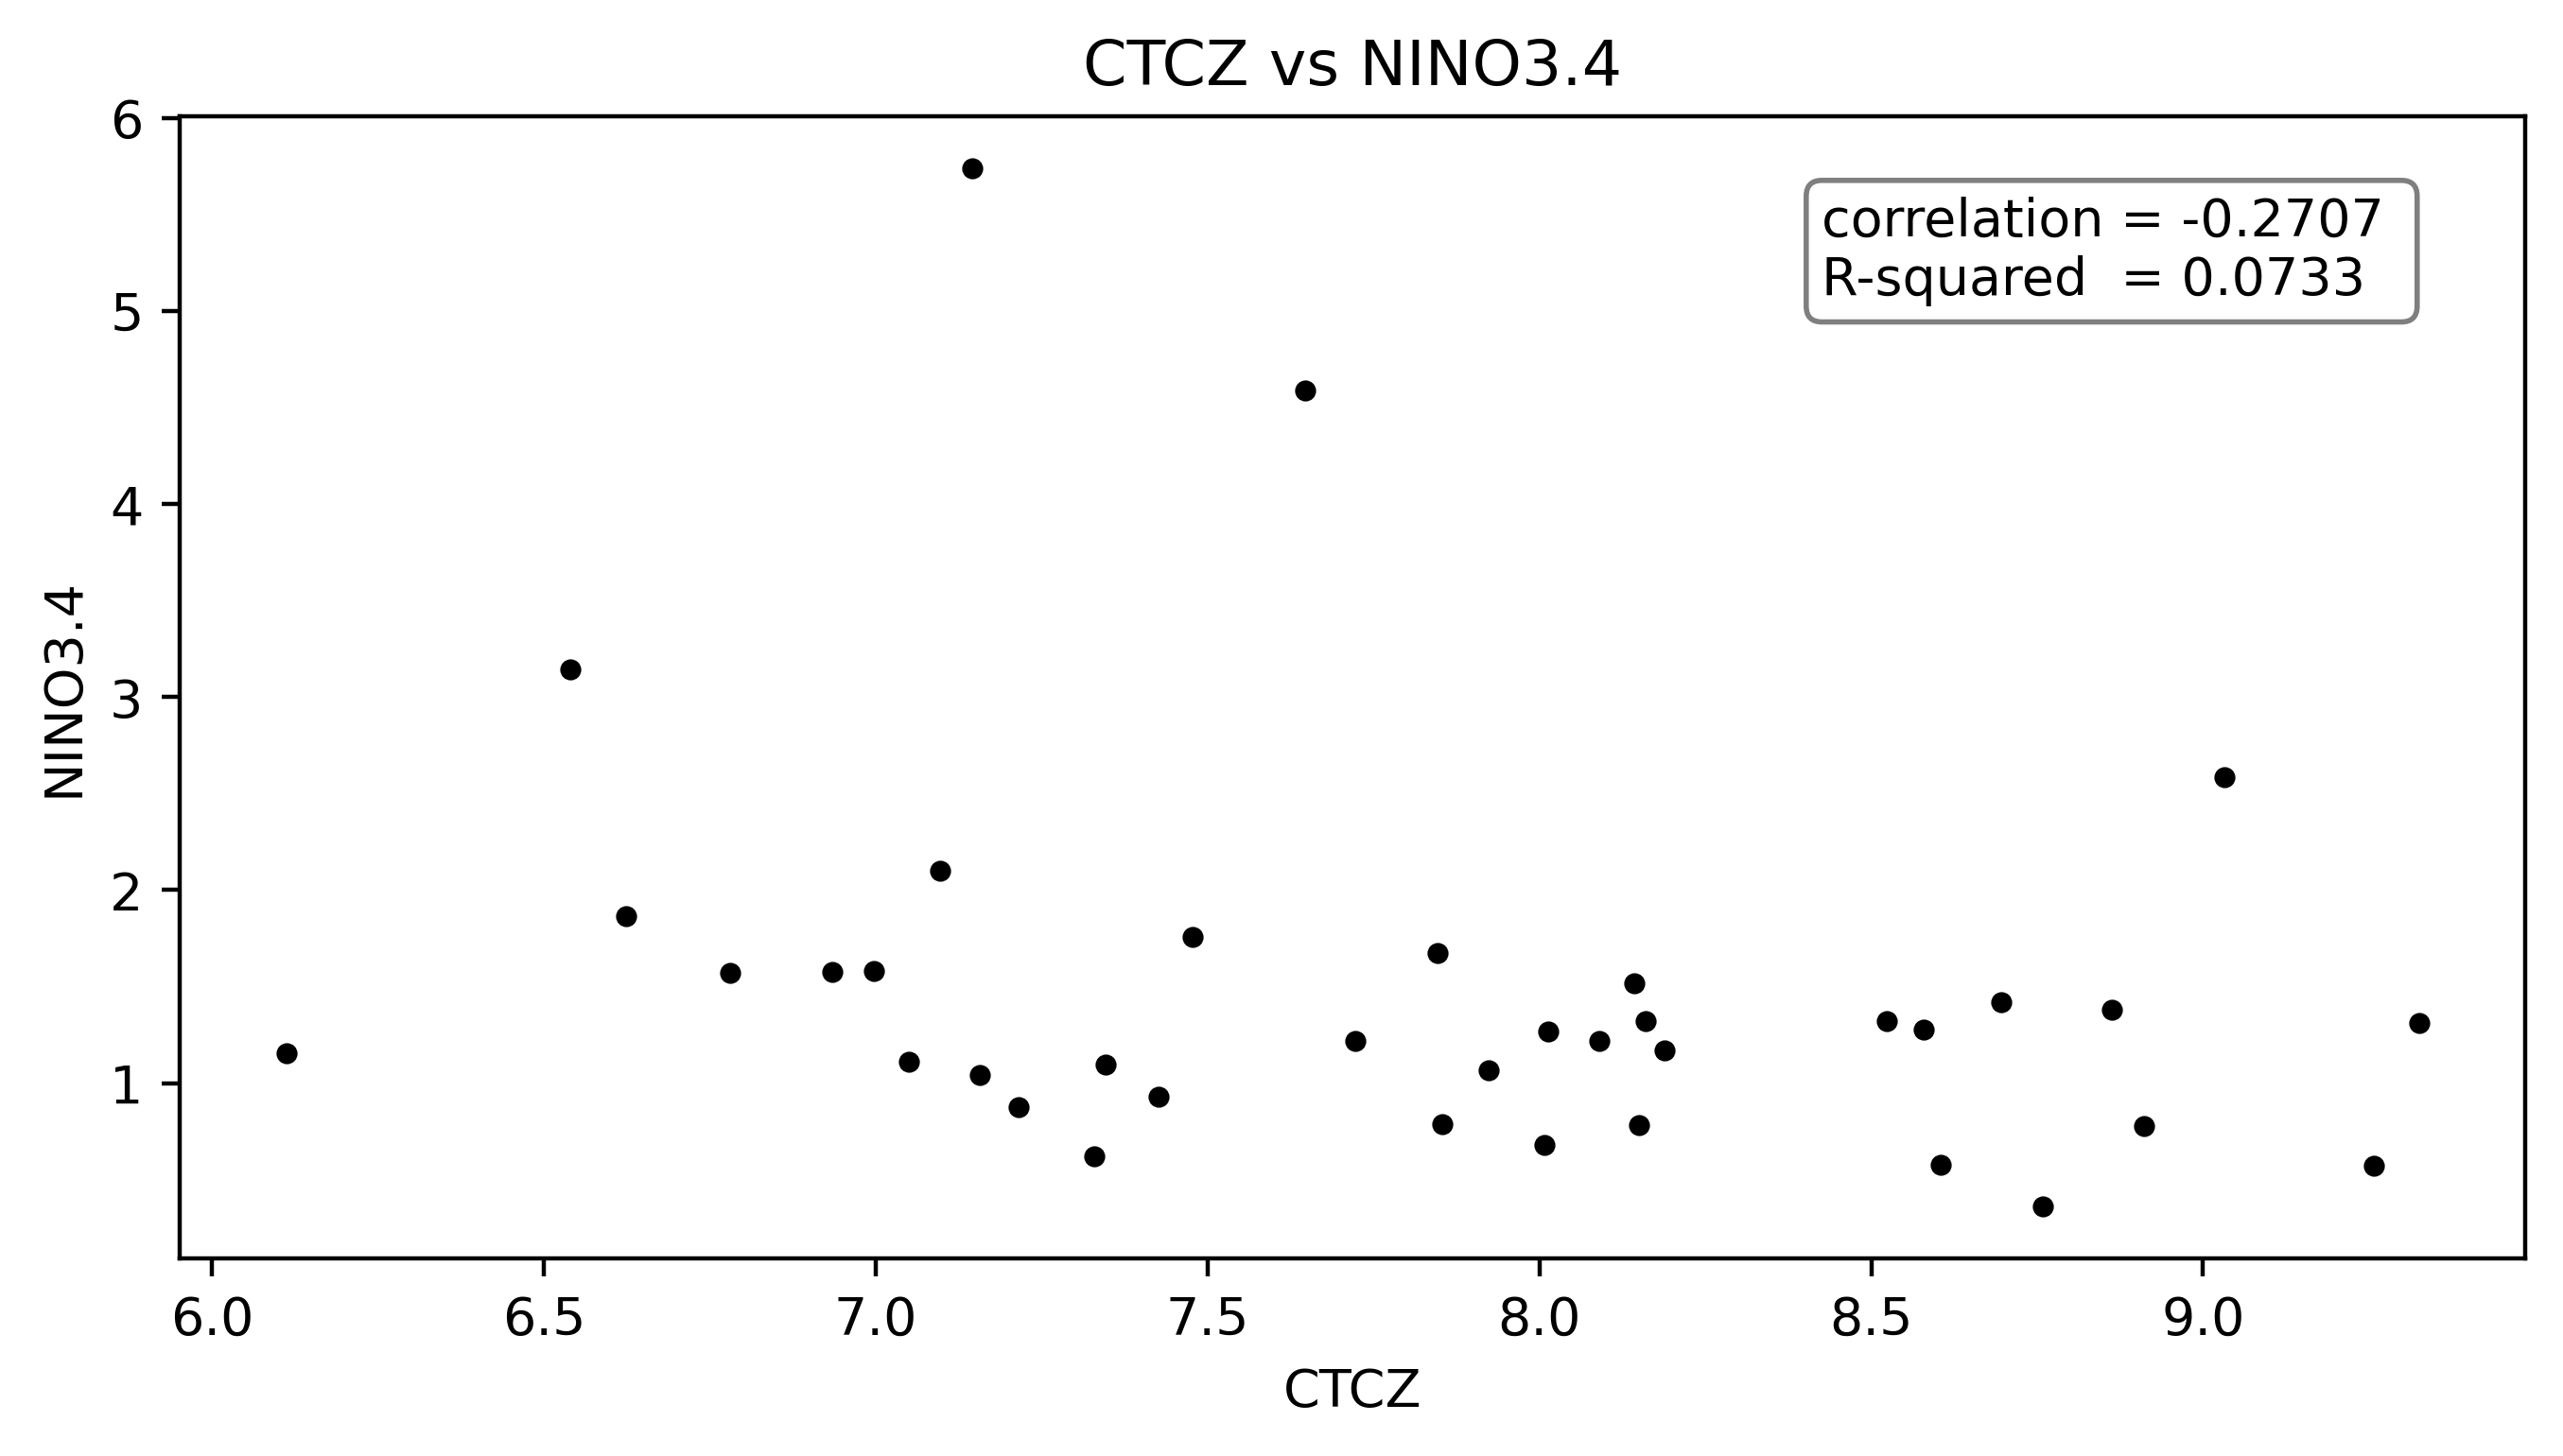

In [91]:
fig = plt.figure(dpi=400, figsize=(8,4))
ax = plt.axes()

ax.set_title('CTCZ vs NINO3.4')
ax.plot(ctcz_jjas_arr, nino_jjas_arr, '.', color='black' )

ax.set_xlabel('CTCZ')
ax.set_ylabel('NINO3.4')

props = dict(boxstyle='round', facecolor='white', alpha=0.5)

ax.text(0.70, 0.93, 'correlation = -0.2707 \nR-squared  = 0.0733', transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

;

#plt.savefig('/home/amal/dir/scatter/n/ctcz_vs_nino34_gpcp.jpg', dpi=400, bbox_inches='tight')
#plt.savefig('ctcz_vs_wpac.jpg', dpi=400, bbox_inches='tight')

In [84]:
#stats
from scipy import stats

In [85]:
np.corrcoef(ctcz_jjas_arr, nino_jjas_arr)

array([[ 1.        , -0.27077189],
       [-0.27077189,  1.        ]])

In [89]:
stats.pearsonr(ctcz_jjas_arr, nino_jjas_arr)

(-0.2707718922481132, 0.10502752114467324)

In [87]:
res = stats.linregress(ctcz_jjas_arr, nino_jjas_arr)
res.rvalue**2

0.07331741763162383

In [16]:
gb_mon = gpcp.precip.groupby(gpcp.time.dt.month)

In [17]:
gb_mon

DataArrayGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

In [20]:
for group_name, group_da in gb_mon:
    # stop iterating after the first loop
    break 
print(group_name)
group_da

1


<xarray.DataArray 'precip' (time: 37, lat: 72, lon: 144)>
[383616 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1979-01-01 1980-01-01 ... 2015-01-01
Attributes:
    long_name:     Average Monthly Rate of Precipitation
    valid_range:   [  0. 100.]
    units:         mm/day
    precision:     32767
    var_desc:      Precipitation
    dataset:       GPCP Version 2.2 Combined Precipitation Dataset
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Mean
    actual_range:  [ 0.      47.07601]

In [33]:
gpcp.isel(time=(gpcp.time.dt.month == 1))

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, time: 37)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1979-01-01 1980-01-01 ... 2015-01-01
Data variables:
    precip   (time, lat, lon) float32 0.6615 0.5773 ... 0.0007723 0.0008308
Attributes:
    Conventions:      COARDS
    title:            GPCP Version 2.2 Combined Precipitation Dataset (Final)
    platform:         Observation
    source:           GPCP Polar Satellite Precipitation Data Centre - Emissi...
    version:          V2.2
    comments:         Please redownload if you obtained this file before Aug ...
    Acknowledgement:  \n,Please cite the original source of the data.\nPlease...
    history:          Converted from netCDF3 to chunked, deflated NetCDF4 Aug...
    dataset_title:    Global Precipitation Analysis (GPCP)
    documentation:    https://www.esrl.noaa.gov/psd/data/gridded/data.gpcp.html
    References:       https://www.esrl.noaa.gov/psd/data/gridded/data.gpcp.html

In [30]:
gpcp.time.dt.month[5:9]

<xarray.DataArray 'month' (time: 4)>
array([6, 7, 8, 9])
Coordinates:
  * time     (time) datetime64[ns] 1979-06-01 1979-07-01 1979-08-01 1979-09-01

In [15]:
ctc.sel(time=slice("1979-06-01", "1979-09-01")).mean(dim=['lat', 'lon', 'time'])

<xarray.Dataset>
Dimensions:  ()
Data variables:
    precip   float32 6.113

In [19]:
gpcp['time.month']

<xarray.DataArray 'month' (time: 442)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2015-10-01

In [41]:
jjas.map(np.mean)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    precip   float32 2.286

In [43]:
xr.open_dataset('jjas.nc')

<xarray.Dataset>
Dimensions:    (time: 37, bnds: 2, lon: 144, lat: 72)
Coordinates:
  * time       (time) datetime64[ns] 1979-07-16T12:00:00 ... 2015-07-16T12:00:00
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * lat        (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    precip     (time, lat, lon) float32 ...
Attributes: (12/14)
    CDI:              Climate Data Interface version 2.0.4 (https://mpimet.mp...
    Conventions:      COARDS
    source:           GPCP Polar Satellite Precipitation Data Centre - Emissi...
    title:            GPCP Version 2.2 Combined Precipitation Dataset (Final)
    platform:         Observation
    version:          V2.2
    ...               ...
    history:          Tue Oct 18 09:34:38 2022: cdo -yearmean -selmon,6/9 /ho...
    dataset_title:    Global Precipitation Analysis (GPCP)
    documentation:    https://www.esrl.noaa.gov/psd/data/gridded/data.gpcp.html
    References:       https://www.esrl.noaa.gov/psd/data/gridded/data.gpcp.html
    frequency:        year
    CDO:              Climate Data Operators version 2.0.4 (https://mpimet.mp...